# 2018-07-25_3dwebmapの調査

M先輩から「3dwebmapのサーバ、中で何動いてるかレポート作って」と指示があった

ログ保存を有効化

In [1]:
%env lc_wrapper_force=on

env: lc_wrapper_force=on


# 調査対象の確認

ansibleのインベントリファイルで対象サーバを確認し、簡単なコマンドが通ることを確認しておく

In [2]:
hosts = !cat ./hosts
hosts

path: /home/jovyan/jtf2018/.log/20180727/20180727-121124-0598.log (0 logs recorded)
start time: 2018-07-27 12:11:24(UTC)
end time: 2018-07-27 12:11:24(UTC)
output size: 484 bytes
0 chunks with matched keywords or errors
----


['jtf2018_boinc_1', 'jtf2018_wiki_1', 'jtf2018_3dwebmap_1']

In [3]:
for h in hosts:
        if h.find('3dwebmap') > -1:
            target = ' -i ./hosts {} -c docker'.format(h)
target

path: /home/jovyan/jtf2018/.log/20180727/20180727-121138-0529.log (0 logs recorded)
start time: 2018-07-27 12:11:38(UTC)
end time: 2018-07-27 12:11:38(UTC)
output size: 574 bytes
0 chunks with matched keywords or errors
----


' -i ./hosts jtf2018_3dwebmap_1 -c docker'

In [4]:
!sudo ansible -a "ls -la" {target}

path: /home/jovyan/jtf2018/.log/20180727/20180727-121158-0938.log (0 logs recorded)
start time: 2018-07-27 12:11:58(UTC)
end time: 2018-07-27 12:12:07(UTC)
output size: 1578 bytes
0 chunks with matched keywords or errors
----
 [WARNING] Ansible is in a world writable directory (/home/jovyan/jtf2018), ignoring it as an ansible.cfg source.
jtf2018_3dwebmap_1 | SUCCESS | rc=0 >>
total 236
drwxr-xr-x   8 node node   4096 Jul 27 12:02 .
drwxr-xr-x   1 root root   4096 Mar 15 18:52 ..
drwxr-xr-x   4 node node   4096 Jul 27 12:02 3dwebclient
-rw-r--r--   1 node node 135373 Mar 15 18:50 CityDBonDocker-big.png
-rw-r--r--   1 node node   1037 Mar 15 18:50 TUM_Logo_blau_rgb_s.svg
drwxr-xr-x   7 node node   4096 Jul 27 12:02 ThirdParty
drwxr-xr-x   2 node node   4096 Mar 15 18:51 data
drwxr-xr-x   5 node node   4096 Jul 27 12:02 examples
-rw-r--r--   1 node node   3400 Mar 15 18:50 index.html
drwxr-xr-x   3 node node   4096 Jul 27 12:02 js
drwxr-xr-x 147 node node   4096 Jul 27 12:02 node_modules


# 調査対象から情報を収集

## OSのバージョン

「linux os 確認」でググって見つけた、/etc/issueを確認する方法を使う

https://eng-entrance.com/linux-os-version

In [5]:
command = "'cat /etc/issue'"
!sudo ansible -a {command} {target}

path: /home/jovyan/jtf2018/.log/20180727/20180727-121455-0514.log (1 logs recorded)
start time: 2018-07-27 12:14:55(UTC)
end time: 2018-07-27 12:15:00(UTC)
output size: 743 bytes
0 chunks with matched keywords or errors
----
 [WARNING] Ansible is in a world writable directory (/home/jovyan/jtf2018), ignoring it as an ansible.cfg source.
jtf2018_3dwebmap_1 | SUCCESS | rc=0 >>
Debian GNU/Linux 8 \n \l


## サービス

「debian サービス 一覧」でググって見つけた、insservを使う

https://www.mk-mode.com/octopress/2015/06/03/debian-8-service-management/

In [6]:
command = "'insserv -s'"
!sudo ansible -a {command} {target}

path: /home/jovyan/jtf2018/.log/20180727/20180727-121708-0247.log (0 logs recorded)
start time: 2018-07-27 12:17:08(UTC)
end time: 2018-07-27 12:17:14(UTC)
output size: 1604 bytes
3 chunks with matched keywords or errors
----
 [WARNING] Ansible is in a world writable directory (/home/jovyan/jtf2018), ignoring it as an ansible.cfg source.
jtf2018_3dwebmap_1 | SUCCESS | rc=0 >>

K:05:0:halt
K:03:0 6:umountfs
K:04:0 6:umountroot
K:02:0 6:umountnfs.sh
K:01:0 6:sendsigs
K:01:0 6:hwclock.sh
K:01:0 6:urandom
K:05:6:reboot
S:02:S:udev
S:04:S:hwclock.sh
S:03:S:mountdevsubfs.sh
S:05:S:checkroot.sh
S:10:S:urandom
S:08:S:mountall.sh
S:09:S:mountall-bootclean.sh
S:01:1 2 3 4 5:motd
S:01:S:hostname.sh
S:02:1:single
S:01:1:killprocs
S:01:1 2 3 4 5:bootlogs
S:02:2 3 4 5:rmnologin
S:12:S:mountnfs.sh
S:13:S:mountnfs-bootclean.sh
S:02:2 3 4 5:rc.local
S:01:S:mountkernfs.sh
S:06:S:checkfs.sh
S:07:S:checkroot-bootclean.sh
S:14:S:bootmisc.sh
S:10:S:udev-finish
S:10:S:procps
S:14:S:x11-common


webサーバなどの、それっぽいサービスは見つからず

## プロセス

psコマンド、これは覚えてる

In [7]:
command = "'ps aux'"
!sudo ansible -a {command} {target}

path: /home/jovyan/jtf2018/.log/20180727/20180727-121839-0415.log (1 logs recorded)
start time: 2018-07-27 12:18:39(UTC)
end time: 2018-07-27 12:18:46(UTC)
output size: 1686 bytes
0 chunks with matched keywords or errors
----
 [WARNING] Ansible is in a world writable directory (/home/jovyan/jtf2018), ignoring it as an ansible.cfg source.
jtf2018_3dwebmap_1 | SUCCESS | rc=0 >>
USER       PID %CPU %MEM    VSZ   RSS TTY      STAT START   TIME COMMAND
node         1  0.0  1.5 888760 31232 ?        Ssl  12:02   0:00 node server.js --public
node       252  2.0  0.0   4336   804 ?        Ss   12:18   0:00 /bin/sh -c /bin/sh -c '/usr/bin/python /home/node/.ansible/tmp/ansible-tmp-1532693922.5147436-72546847622298/command.py && sleep 0'
node       258  0.0  0.0   4336   752 ?        S    12:18   0:00 /bin/sh -c /usr/bin/python /home/node/.ansible/tmp/ansible-tmp-1532693922.5147436-72546847622298/command.py && sleep 0
node       259  2.0  0.4  31592 10068 ?        S    12:18   0:00 /usr/bin/pyth

node.jsが動いてる

## LISTENポート

「listen debian」でググって見つけた、ssを使う

http://mzgkworks.com/post/linux-port-confirm/

In [8]:
command = "'ss -lnat'"
!sudo ansible -a {command} {target}

path: /home/jovyan/jtf2018/.log/20180727/20180727-122105-0895.log (0 logs recorded)
start time: 2018-07-27 12:21:05(UTC)
end time: 2018-07-27 12:21:11(UTC)
output size: 808 bytes
0 chunks with matched keywords or errors
----
 [WARNING] Ansible is in a world writable directory (/home/jovyan/jtf2018), ignoring it as an ansible.cfg source.
jtf2018_3dwebmap_1 | SUCCESS | rc=0 >>
State      Recv-Q Send-Q        Local Address:Port          Peer Address:Port 
LISTEN     0      128                      :::8000                    :::*     


In [9]:
command = "'ss -lnau'"
!sudo ansible -a {command} {target}

path: /home/jovyan/jtf2018/.log/20180727/20180727-122124-0669.log (0 logs recorded)
start time: 2018-07-27 12:21:24(UTC)
end time: 2018-07-27 12:21:30(UTC)
output size: 716 bytes
0 chunks with matched keywords or errors
----
 [WARNING] Ansible is in a world writable directory (/home/jovyan/jtf2018), ignoring it as an ansible.cfg source.
jtf2018_3dwebmap_1 | SUCCESS | rc=0 >>
State      Recv-Q Send-Q        Local Address:Port          Peer Address:Port 


8000番ポートでLISTENしてる

# サービスの確認

8000番ポートにブラウザでアクセスしてみる

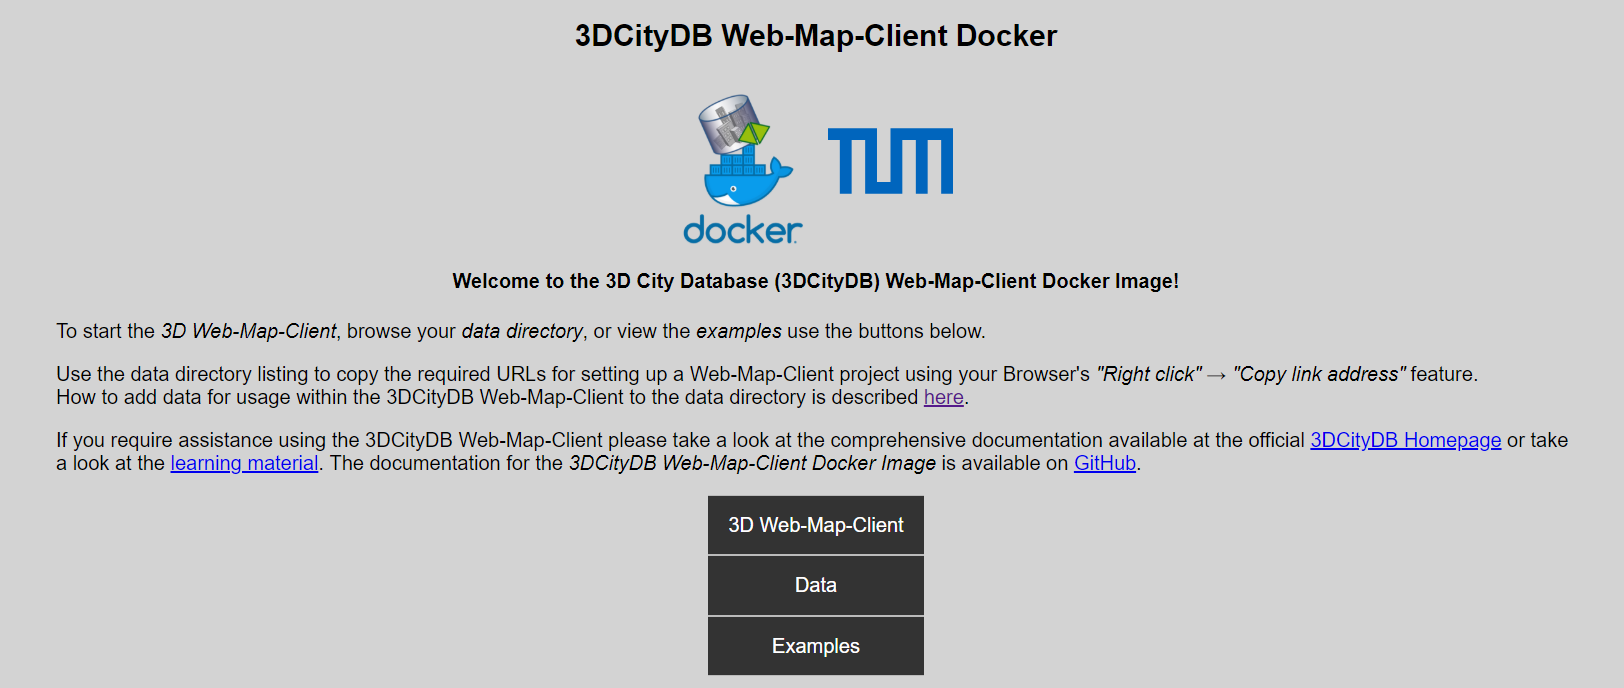

地図が見れるwebアプリだった

# まとめ

node.jsで8000番ポートからサービスされてる、地図が見れるwebアプリが動いている